In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
train = pd.read_csv('train.csv')
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [75]:
train.shape

(35000, 20)

In [76]:
train.duplicated().sum()

0

In [77]:
train.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.0,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
mean,9.088815,1.110086,1.123400,31.920911,0.320337,0.486929,6.142190,2.262871,0.299940,41.442469,152.543943,146.852200,2018.0,6.132429,15.337743,2.885200,13.803657,2257.38360,41.324249
std,4.496854,0.581456,0.350842,14.689516,0.402590,0.079781,4.397599,3.578315,0.004242,19.241543,59.764598,76.373292,0.0,3.342088,8.691250,1.926999,6.224485,5112.41526,19.167043
min,0.010000,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,1.00000,0.310000
25%,6.470000,1.000000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,132.000000,87.000000,2018.0,3.000000,7.000000,1.000000,10.000000,1448.00000,30.300000
50%,8.700000,1.000000,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,138.000000,141.000000,2018.0,6.000000,16.000000,3.000000,14.000000,1862.00000,38.460000
75%,10.990000,1.000000,1.000000,36.000000,0.500000,0.500000,8.100000,5.760000,0.300000,48.352500,186.000000,229.000000,2018.0,9.000000,23.000000,4.000000,19.000000,2340.00000,48.200000
max,79.010000,5.000000,4.000000,400.000000,18.500000,0.500000,215.000000,189.500000,0.300000,468.350000,265.000000,265.000000,2018.0,12.000000,31.000000,6.000000,23.000000,86347.00000,468.350000


In [78]:
train.isnull().sum()

trip_distance              0
rate_code                  0
store_and_fwd_flag         0
payment_type               0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
imp_surcharge              0
total_amount               0
pickup_location_id         0
dropoff_location_id        0
year                       0
month                      0
day                        0
day_of_week                0
hour_of_day                0
trip_duration              0
calculated_total_amount    0
dtype: int64

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_distance            35000 non-null  float64
 1   rate_code                35000 non-null  int64  
 2   store_and_fwd_flag       35000 non-null  object 
 3   payment_type             35000 non-null  int64  
 4   fare_amount              35000 non-null  float64
 5   extra                    35000 non-null  float64
 6   mta_tax                  35000 non-null  float64
 7   tip_amount               35000 non-null  float64
 8   tolls_amount             35000 non-null  float64
 9   imp_surcharge            35000 non-null  float64
 10  total_amount             35000 non-null  float64
 11  pickup_location_id       35000 non-null  int64  
 12  dropoff_location_id      35000 non-null  int64  
 13  year                     35000 non-null  int64  
 14  month                 

In [80]:
test = pd.read_csv('test.csv')
test.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


In [81]:
test.shape

(15000, 19)

In [82]:
test.isnull().sum()

trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
year                   0
month                  0
day                    0
day_of_week            0
hour_of_day            0
trip_duration          0
dtype: int64

In [83]:
combined = pd.concat([train, test], axis = 0)
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [84]:
combined['store_and_fwd_flag'] = combined['store_and_fwd_flag'].replace({'N':0, 'Y': 1})
combined['store_and_fwd_flag'] = combined['store_and_fwd_flag'].astype(int)

In [85]:
combined = combined.drop(['pickup_location_id', 'dropoff_location_id', 'year', 'store_and_fwd_flag', 'imp_surcharge', 
                         'mta_tax', 'payment_type', 'rate_code'], axis = 1)

In [86]:
newtrain = combined.iloc[0:35000, :]
newtrain.shape

(35000, 12)

In [87]:
newtest = combined.iloc[35000:, :-1]
newtest.head()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,45.0,0.0,0.00,0.00,45.80,10,20,5,16,3967.0
1,7.30,25.5,0.0,7.89,0.00,34.19,2,24,5,15,1491.0
2,14.87,40.5,0.5,8.36,0.00,50.16,9,11,1,22,1395.0
3,2.90,22.0,0.0,0.00,0.00,22.80,6,7,3,11,1742.0
4,8.96,32.0,0.0,0.00,5.76,38.56,4,20,4,10,1623.0


In [88]:
newtest.shape

(15000, 11)

<AxesSubplot:>

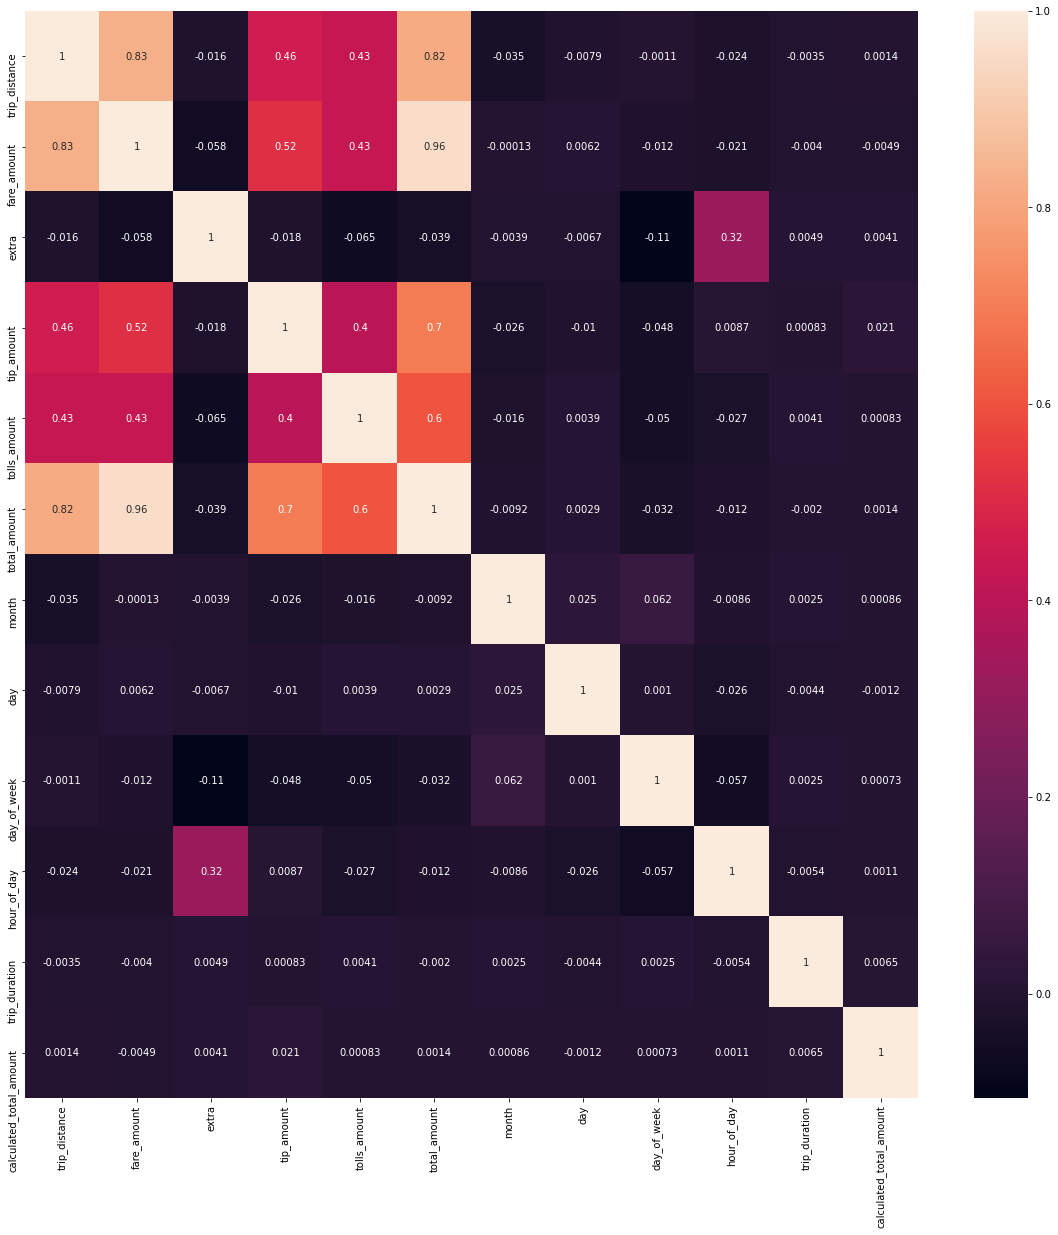

In [89]:
plt.figure(figsize=(20, 20))
sns.heatmap(newtrain.corr(), annot= True)

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

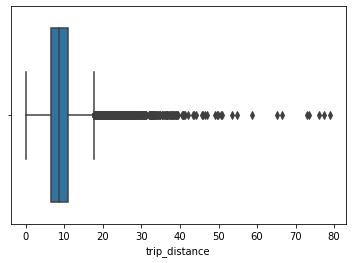

In [90]:
sns.boxplot(newtrain['trip_distance'])

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

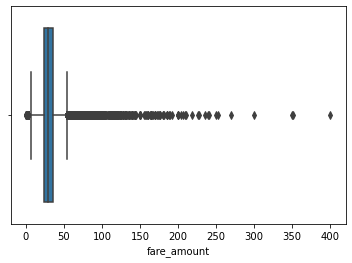

In [91]:
sns.boxplot(newtrain['fare_amount'])

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount'>

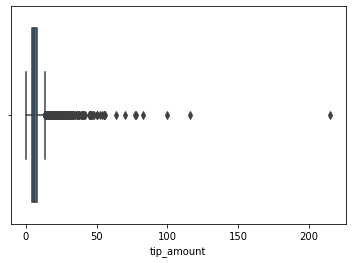

In [92]:
sns.boxplot(newtrain['tip_amount'])

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_amount'>

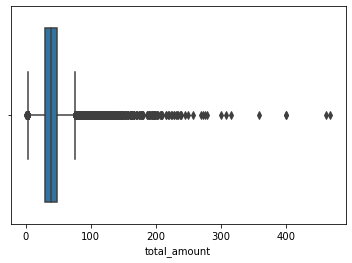

In [93]:
sns.boxplot(newtrain['total_amount'])

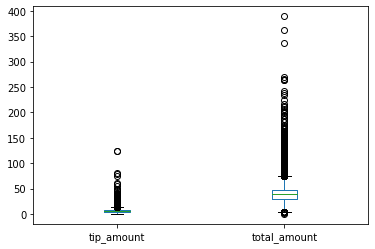

In [94]:
ax = newtest[['tip_amount', 'total_amount']].plot(kind = 'box')
plt.show()

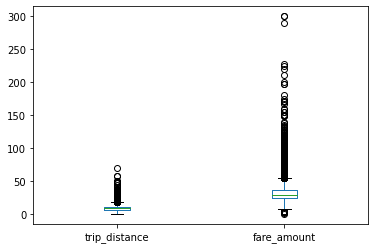

In [95]:
ax = newtest[['trip_distance', 'fare_amount']].plot(kind = 'box')
plt.show()

In [96]:
def scaling_function(df,column_name):
    for i in df[column_name]:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3-q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        if i > upper or i < lower:
            df[column_name] = df[column_name].replace(i, np.median(df[column_name]))

In [97]:
scaling_function(newtest,'trip_distance')

In [98]:
scaling_function(newtest,'fare_amount')

In [99]:
scaling_function(newtest,'tip_amount')

In [100]:
scaling_function(newtest,'total_amount')

In [101]:
scaling_function(newtrain,'trip_distance')

<ipython-input-96-dd5846ce1334>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(i, np.median(df[column_name]))


In [102]:
scaling_function(newtrain,'fare_amount')

<ipython-input-96-dd5846ce1334>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(i, np.median(df[column_name]))


In [103]:
scaling_function(newtrain,'tip_amount')

<ipython-input-96-dd5846ce1334>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(i, np.median(df[column_name]))


In [104]:
scaling_function(newtrain,'total_amount')

<ipython-input-96-dd5846ce1334>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(i, np.median(df[column_name]))


In [122]:
x = newtrain.drop('calculated_total_amount', axis = 1)
y = newtrain['calculated_total_amount']

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [107]:
from sklearn.metrics import mean_squared_error

In [108]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred = lr.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

19.033062583687784


In [109]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

19.57126638383566


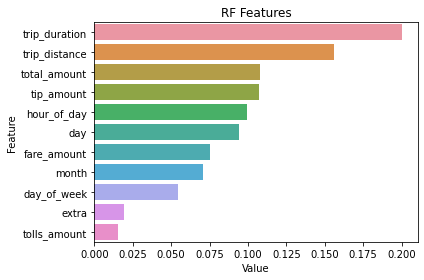

In [110]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, x.columns), reverse=True)[:20], columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()


In [126]:
x_train = newtrain.drop(['calculated_total_amount', 'extra', 'tolls_amount'], axis = 1)
y_train = newtrain['calculated_total_amount']
x_test = newtest.drop([ 'extra', 'tolls_amount'], axis = 1)

In [2]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'calculated_total_amount': y_pred})
solution.to_csv('Solution.csv', index = False)